# Import necessary libraries

In [15]:
import requests
from bs4 import BeautifulSoup

import pandas as pd 

from imdb import IMDb

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

# Import data
Import necessary columns and remove NaNs 

In [17]:
col_type = {col: object for col in range(9)} 
columns = ['tconst', 'titleType', 'primaryTitle', 'startYear']
NAs = {'tconst': r'\N', 'titleType': r'\N', 'primaryTitle': r'\N', 'startYear': r'\N'}
data = pd.read_csv('/Users/davidf./thesis_tf/Movie/Franchises/data.tsv', 
                   sep='\t', 
                   dtype=col_type, 
                   usecols=columns, 
                   na_values=NAs)

# Subset for movies
df = data[data['titleType']=='movie']

# Remove unnecessary column
df = df.drop('titleType', axis = 1)

# Remove NAs from year
df = df[df['startYear'].notna()]

# Convert the integer column to string
df['startYear'] = pd.to_datetime(df['startYear'], format='%Y').dt.year

# Rename primaryTitle to title and startYear to year
df = df.rename(columns=({'primaryTitle':'title', 'startYear':'year'}))

# Subset

### Harry Potter franchise

In [18]:
# Make a new dataframe with the Harry Potter franchise
potter = df[df['title'].str.contains("Harry Potter and the")]

# The first eight entries are the movies
potter = potter.iloc[:8]

# Add franchise column
potter['franchise'] = 'Harry Potter'

potter

,tconst,title,year,franchise
231365,tt0241527,Harry Potter and the Sorcerer's Stone,2001,Harry Potter
282685,tt0295297,Harry Potter and the Chamber of Secrets,2002,Harry Potter
291055,tt0304141,Harry Potter and the Prisoner of Azkaban,2004,Harry Potter
316342,tt0330373,Harry Potter and the Goblet of Fire,2005,Harry Potter
358281,tt0373889,Harry Potter and the Order of the Phoenix,2007,Harry Potter
400600,tt0417741,Harry Potter and the Half-Blood Prince,2009,Harry Potter
896533,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,Harry Potter
2087666,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,Harry Potter


### Star Wars franchise

In [19]:
starwars = df[df['title'].str.contains("star wars: episode", case=False)]

# Remove movies not in franchise
starwars = starwars[~starwars['tconst'].isin(['tt8452558'])]

# Add franchise column
starwars['franchise'] = ['Star Wars'] * 3 + ['Star Wars prequel'] * 3 + ['Star Wars sequel'] * 3

starwars

,tconst,title,year,franchise
75149,tt0076759,Star Wars: Episode IV - A New Hope,1977,Star Wars
78965,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,Star Wars
84309,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,Star Wars
117972,tt0120915,Star Wars: Episode I - The Phantom Menace,1999,Star Wars prequel
118694,tt0121765,Star Wars: Episode II - Attack of the Clones,2002,Star Wars prequel
118695,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,Star Wars prequel
6137011,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,Star Wars sequel
6168130,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,Star Wars sequel
6168139,tt2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,Star Wars sequel


### Transformers franchise

In [20]:
# Find Transformers movies after 2006
transformers = df[df['title'].str.contains("Transformers") & (df['year'] > 2006)]

# Remove movies not in franchise
transformers = transformers[~transformers['tconst'].isin(['tt23090116', 'tt16578864', 'tt8864596'])]

# Add Bumblebee movie to franchise
bumblebee = df[df['title']=='Bumblebee']
transformers = pd.concat([transformers, bumblebee], ignore_index=True)

# Sort values by year
transformers = transformers.sort_values(by='year')

# Add franchise column
transformers['franchise'] = 'Transformers'

transformers

,tconst,title,year,franchise
0,tt0418279,Transformers,2007,Transformers
1,tt1055369,Transformers: Revenge of the Fallen,2009,Transformers
2,tt1399103,Transformers: Dark of the Moon,2011,Transformers
3,tt2109248,Transformers: Age of Extinction,2014,Transformers
4,tt3371366,Transformers: The Last Knight,2017,Transformers
6,tt4701182,Bumblebee,2018,Transformers
5,tt5090568,Transformers: Rise of the Beasts,2023,Transformers


### Pirates of the Caribbean franchise

In [21]:
pirates = df[df['title'].str.contains("Pirates of the Caribbean:")].copy()

pirates.loc[:, 'franchise'] = 'Pirates of the Caribbean'

pirates


,tconst,title,year,franchise
312102,tt0325980,Pirates of the Caribbean: The Curse of the Bla...,2003,Pirates of the Caribbean
367677,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,Pirates of the Caribbean
431121,tt0449088,Pirates of the Caribbean: At World's End,2007,Pirates of the Caribbean
2606156,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,Pirates of the Caribbean
4718123,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,2017,Pirates of the Caribbean


### Fast and the Furious franchise

In [22]:
fastf = df[(df['title'].str.contains('fast', case=False)) &
           (df['title'].str.contains('furious', case=False)) &
           (df['year'] > 1990)]

# Remove movies not in franchise
fastf = fastf[~fastf['tconst'].isin(['tt7167938', 'tt26343494', 'tt13943572'])]

# Manually add missing
fast_missing = ['Fast Five', 'Furious 7', 'The Fate of the Furious', 'F9: The Fast Saga', 'Fast X']
fast_matching = df[df['title'].isin(fast_missing)]
fastf = pd.concat([fastf, fast_matching])

# Sort values by year
fastf = fastf.sort_values(by='year')

# Add franchise column
fastf['franchise'] = 'The Fast and the Furious'

fastf

,tconst,title,year,franchise
222691,tt0232500,The Fast and the Furious,2001,The Fast and the Furious
308494,tt0322259,2 Fast 2 Furious,2003,The Fast and the Furious
445621,tt0463985,The Fast and the Furious: Tokyo Drift,2006,The Fast and the Furious
1043974,tt1013752,Fast & Furious,2009,The Fast and the Furious
4220606,tt1596343,Fast Five,2011,The Fast and the Furious
4956719,tt1905041,Fast & Furious 6,2013,The Fast and the Furious
6781709,tt2820852,Furious 7,2015,The Fast and the Furious
7581658,tt4630562,The Fate of the Furious,2017,The Fast and the Furious
8545744,tt6806448,Fast & Furious Presents: Hobbs & Shaw,2019,The Fast and the Furious
7936415,tt5433138,F9: The Fast Saga,2021,The Fast and the Furious


### Jurassic franchise

In [23]:
# Sort for movies with jurassic and park or world in the title
mask = df['title'].str.contains('jurassic', case=False) & (df['title'].str.contains('park', case=False) | df['title'].str.contains('world', case=False))

# Apply the mask to filter the dataframe
jurassic = df[mask]

# Remove movies not in franchise
jurassic = jurassic[~jurassic['tconst'].isin(['tt16359938', 'tt21162902', 'tt13943572', 'tt4130956', 'tt21163376'])]

# Add franchise column
jurassic['franchise'] = ['Jurassic Park'] * 3 + ['Jurassic World'] * 3
jurassic


,tconst,title,year,franchise
104884,tt0107290,Jurassic Park,1993,Jurassic Park
116754,tt0119567,The Lost World: Jurassic Park,1997,Jurassic Park
157736,tt0163025,Jurassic Park III,2001,Jurassic Park
354155,tt0369610,Jurassic World,2015,Jurassic World
7691852,tt4881806,Jurassic World: Fallen Kingdom,2018,Jurassic World
9108731,tt8041270,Jurassic World Dominion,2022,Jurassic World


### The Lord of the Rings franchise

In [24]:
rings = df[(df['title'].str.contains('the lord of the rings:', case=False)) &
           (df['year'] >= 2001) &
           (df['year'] <= 2003)] 

# Sort values by year
rings = rings.sort_values(by='year')

# Add franchise column
rings['franchise'] = 'The Lord of the Rings'
rings

,tconst,title,year,franchise
117836,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,The Lord of the Rings
161615,tt0167261,The Lord of the Rings: The Two Towers,2002,The Lord of the Rings
161614,tt0167260,The Lord of the Rings: The Return of the King,2003,The Lord of the Rings


### The Hobbit franchise

In [25]:
hobbit = df[(df['title'].str.contains('the hobbit:', case=False)) &
           (df['year'] >= 2012) &
           (df['year'] <= 2014)] 

# Remove movies not in franchise
hobbit = hobbit[~hobbit['tconst'].isin(['tt4171362'])]

# Sort values by year
hobbit = hobbit.sort_values(by='year')

# Add franchise column
hobbit['franchise'] = 'The Hobbit'
hobbit

,tconst,title,year,franchise
874918,tt0903624,The Hobbit: An Unexpected Journey,2012,The Hobbit
1914198,tt1170358,The Hobbit: The Desolation of Smaug,2013,The Hobbit
5887183,tt2310332,The Hobbit: The Battle of the Five Armies,2014,The Hobbit


# Merge franchises

In [26]:
franchises = pd.concat([potter, starwars, transformers, pirates, fastf, jurassic, rings, hobbit], ignore_index=True)
franchises

,tconst,title,year,franchise
0,tt0241527,Harry Potter and the Sorcerer's Stone,2001,Harry Potter
1,tt0295297,Harry Potter and the Chamber of Secrets,2002,Harry Potter
2,tt0304141,Harry Potter and the Prisoner of Azkaban,2004,Harry Potter
3,tt0330373,Harry Potter and the Goblet of Fire,2005,Harry Potter
4,tt0373889,Harry Potter and the Order of the Phoenix,2007,Harry Potter
5,tt0417741,Harry Potter and the Half-Blood Prince,2009,Harry Potter
6,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,Harry Potter
7,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,Harry Potter
8,tt0076759,Star Wars: Episode IV - A New Hope,1977,Star Wars
9,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,Star Wars


# Budget scrape

In [27]:
# Function to scrape box office information
def scrape_box_office_info(tconst):
    url = f"https://www.boxofficemojo.com/title/{tconst}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Initialize variables
    budget = ""
    domestic_gross = ""
    international_gross = ""
    worldwide_gross = ""

    # Extract bo information
    budget_element = soup.select_one("#a-page > main > div > div.a-section.a-spacing-none.mojo-gutter.mojo-summary-table > div.a-section.a-spacing-none.mojo-summary-values.mojo-hidden-from-mobile > div:nth-child(3) > span:nth-child(2) > span")
    if budget_element:
        budget = budget_element.text.strip().replace("$", "").replace(",", "")

    # Extract gross information
    table = soup.find("div", {"class": "a-section a-spacing-none mojo-performance-summary-table"})
    if table:
        gross_values = table.find_all("span", {"class": "money"})
        if len(gross_values) >= 3:
            domestic_gross = gross_values[0].text.strip().replace("$", "").replace(",", "")
            international_gross = gross_values[1].text.strip().replace("$", "").replace(",", "")
            worldwide_gross = gross_values[2].text.strip().replace("$", "").replace(",", "")

    return budget, domestic_gross, international_gross, worldwide_gross

# Scrape box office information for each movie
box_office_data = []
for index, row in franchises.iterrows():
    tconst = row["tconst"]
    title = row["title"]
    year = row["year"]
    franchise = row["franchise"]
    budget, domestic_gross, international_gross, worldwide_gross = scrape_box_office_info(tconst)
    box_office_data.append([tconst, title, year, budget, domestic_gross, international_gross, worldwide_gross, franchise])

# Create new dataframe with bo information
new_columns = ['tconst', 'title', 'year', 'budget', 'domestic_gross', 'international_gross', 'worldwide_gross', 'franchise']
franchise_gross = pd.DataFrame(box_office_data, columns=new_columns)

### Add missing budgets manually

In [28]:
franchise_gross.at[6, 'budget'] = '125000000'
franchise_gross.at[7, 'budget'] = '125000000'
franchise_gross.at[23, 'budget'] = '200000000'
franchise_gross.at[31, 'budget'] = '85000000'
franchise_gross.at[38, 'budget'] = '212500000'
franchise_gross.at[39, 'budget'] = '340000000'
franchise_gross.at[45, 'budget'] = '265000000'
franchise_gross.at[49, 'budget'] = '150000000'
franchise_gross.at[50, 'budget'] = '150000000'
franchise_gross.at[51, 'budget'] = '150000000'

In [29]:
# Cast column types
column_types = {'budget': int,
                'domestic_gross': int,
                'international_gross': int,
                'worldwide_gross': int}

franchise_gross = franchise_gross.astype(column_types)

# Add movie ratings

In [31]:
ia = IMDb()

def fetch_movie_data(tt_number):
    movie_id = tt_number[2:]  # Remove 'tt' from the tt-number
    movie = ia.get_movie(movie_id)
    
    rating = movie.get('rating') # Get the rating
    return rating

temp = franchise_gross['tconst'].map(fetch_movie_data) # Make temporary data

franchise_gross.insert(3, 'rating', temp)

# Correlations
The highest correlation with the rating is the domestic gross, but a correlation of 0.32 is not that strong. It is surprising how weak the correlation between the rating and the international gross is.
There is a pretty strong correlation between domestic gross and worldwide gross, and a very strong correlation between international gross and worldwide gross. The fact that there is a stronger correlation between the international gross and the worldwide gross is logical, since the international market is so much bigger than the domestic market.

In [32]:
franchise_gross[['rating', 'domestic_gross', 'international_gross', 'worldwide_gross']].corr()

,rating,domestic_gross,international_gross,worldwide_gross
rating,1.000000,0.318739,0.092203,0.217439
domestic_gross,0.318739,1.000000,0.518879,0.799494
international_gross,0.092203,0.518879,1.000000,0.926871
worldwide_gross,0.217439,0.799494,0.926871,1.000000


# Visualize

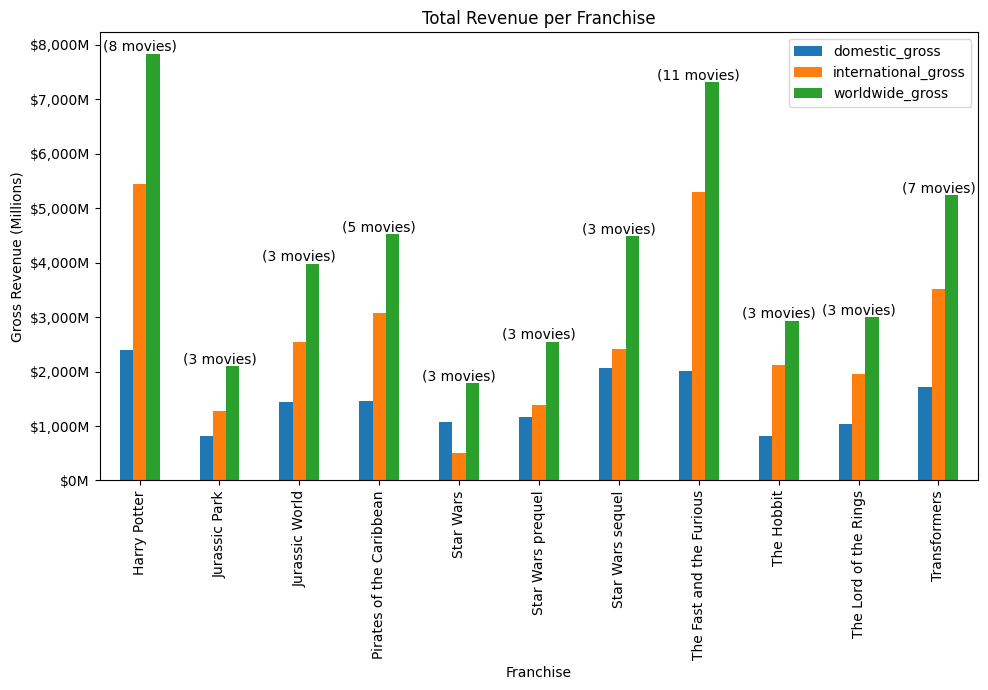

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))

# Group by franchise and calculate the total gross revenue
total_gross_millions = franchise_gross.groupby('franchise').sum(
    numeric_only=True)[['domestic_gross', 'international_gross', 'worldwide_gross']] / 1000000

# Make bar plot
total_gross_millions.plot(kind='bar', ax=ax)

# Number of movies in each franchise
movie_counts = franchise_gross['franchise'].value_counts()

# Annotate each bar with the count of movies in the respective franchise
for i, franchise in enumerate(total_gross_millions.index):
    ax.text(i, total_gross_millions.loc[franchise].max(), f'({movie_counts[franchise]} movies)', ha='center', va='bottom')

ax.set_title('Total Revenue per Franchise')
ax.set_ylabel('Gross Revenue (Millions)')
ax.set_xlabel('Franchise')

# Create function to format y-axis labels
def millions_formatter(x, pos):
    return f'${"{:,.0f}".format(x)}M'

# Apply the custom formatter to the y-axis tick labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

## Domestic vs international gross

The biggest difference between domestic and international gross is by far in the Fast and Furious and Harry Potter franchises.

In [34]:
franchise_gross['gross_diff'] = franchise_gross['international_gross'] - franchise_gross['domestic_gross']
franchise_diff = franchise_gross.groupby('franchise')['gross_diff'].sum()
franchise_diff.sort_values(ascending=False)

franchise
The Fast and the Furious    3297022879
Harry Potter                3050927965
Transformers                1796264206
Pirates of the Caribbean    1621216869
The Hobbit                  1305147489
Jurassic World              1088026890
The Lord of the Rings        916792077
Jurassic Park                468275581
Star Wars sequel             338647998
Star Wars prequel            218269249
Star Wars                   -561871885
Name: gross_diff, dtype: int64

In [35]:
def plot_franchise(franchise_gross, franchise_name):
    
    # Choose franchise
    franchise_data = franchise_gross[franchise_gross['franchise'] == franchise_name].copy()

    # Normalize to millions
    franchise_data.loc[:, ['domestic_gross', 'international_gross']] /= 1000000

    # Set fig size
    fig, ax = plt.subplots(figsize=(9,8))

    # Make bar plot
    franchise_data.set_index('title')[['domestic_gross', 'international_gross']].plot(kind='bar', ax=ax)

    ax.set_title(f'Domestic vs International Revenue per Movie in {franchise_name}')
    ax.set_ylabel('Gross Revenue (Millions)')
    ax.set_xlabel('Movie')

    # Create function to format y-axis labels
    def millions_formatter(x, pos):
        return f'${"{:,.0f}".format(x)}M'

    # Apply the custom formatter to the y-axis tick labels
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
    
    # Rotate x-axis labels
    plt.xticks(rotation=65)

    plt.tight_layout()
    plt.show()


# Differences

Interestingly, the Fast and the Furious franchise started out having the highest gross in domestically, but already after the second movie, the franchise started grossing higher in the international market. 

With the Harry Potter franchise, the international market was always the highest grossing. 

The most likely explanation being that the Fast and the Furious franchise needed some introduction to the audience, whereas the Harry Potter franchise was an established franchise because of the books.

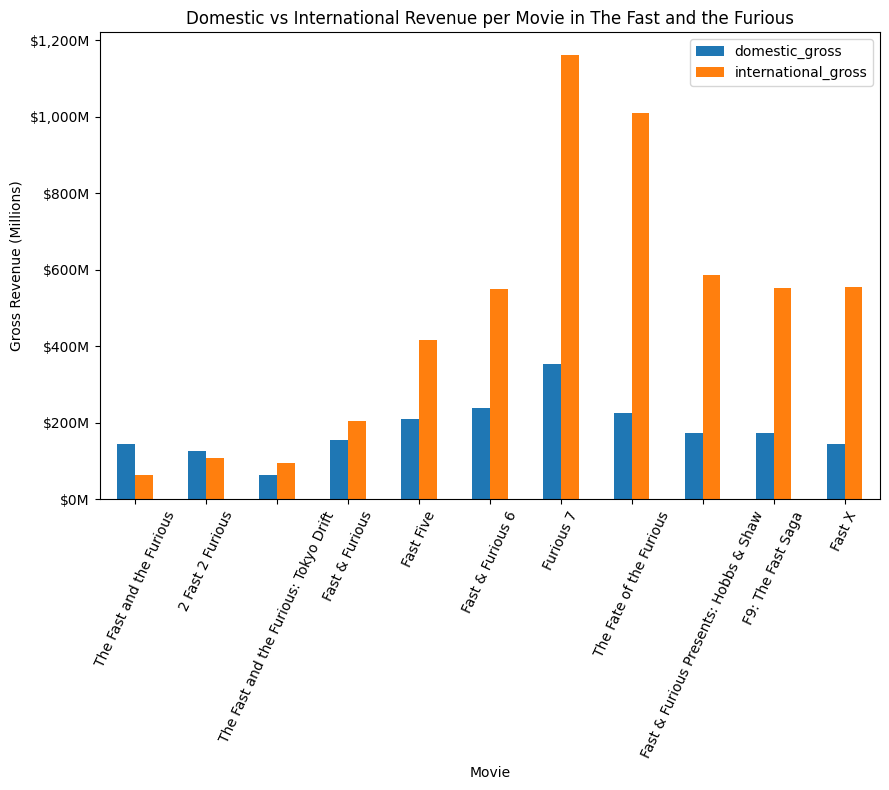

In [36]:
# Plot the Fast and the Furious franchise data
plot_franchise(franchise_gross, 'The Fast and the Furious')

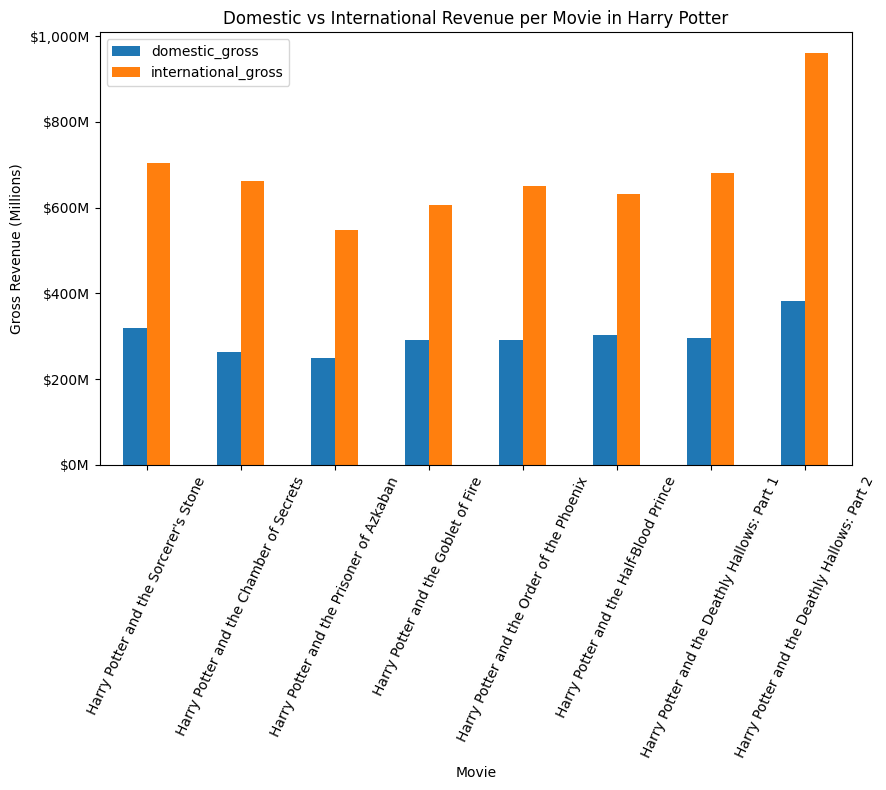

In [37]:
# Plot the Harry Potter franchise data
plot_franchise(franchise_gross, 'Harry Potter')